## Guided Project: Star Wars Survey
### *By: Naftali N Indongo*

## 1. Introduction

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com) became interested in answering some questions about Star Wars fans. In particular, they wondered: **does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

For this project, you'll clean and explore the dataset in Jupyter notebook.

The data has several columns, including the following:

- <font color=red>RespondentID</font> — An anonymized ID for the respondent (person taking the survey)
- <font color=red>Gender</font> — the respondent's gender
- <font color=red>Age</font> — the respondent's age
- <font color=red>Household Income</font> — the respondent's income
- <font color=red>Education</font> — the respondent's education level
- <font color=red>Location (Census Region)</font> — the respondent's location
- <font color=red>Have you seen any of the 6 films in the Star Wars franchise?</font> — a <font color=red>Yes</font> or <font color=red>No</font> response
- <font color=red>Do you consider yourself to be a fan of the Star Wars film franchise?</font> — a <font color=red>Yes</font> or <font color=red>No</font> response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Below, we will read in and explore the dataset.

In [88]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [89]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## 2. Cleaning and Mapping Yes/No Columns

Take a look at the next two columns:

- <font color=red>Have you seen any of the 6 films in the Star Wars franchise?</font>
- <font color=red>Do you consider yourself to be a fan of the Star Wars film franchise?</font>

Both represent <font color=red>Yes/No</font> questions. They can also be <font color=red>NaN</font> where a respondent chooses not to answer a question. We can use the [pandas.Series.value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are <font color=red>Yes</font> and <font color=red>No</font>. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values <font color=red>True</font>, <font color=red>False</font>, and <font color=red>NaN</font>. Booleans are easier to work with because we can select the rows that are <font color=red>True</font> or <font color=red>False</font> without having to do a string comparison.


We can use the [pandas.Series.map()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) method on series objects to perform the conversion.

Below we will convert the <font color=red>Have you seen any of the 6 films in the Star Wars franchise?</font> and <font color=red>Do you consider yourself to be a fan of the Star Wars film franchise?</font> columns to Boolean type. 

In [90]:
yes_no = {"Yes": True,"No": False}

for col in star_wars.columns[1:3]:
    star_wars[col]=star_wars[col].map(yes_no)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## 3. Cleaning and Mapping Checkbox Columns
The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, <font color=red>Which of the following Star Wars films have you seen? Please select all that apply</font>.

The columns for this question are:

- <font color=red>Which of the following Star Wars films have you seen? Please select all that apply.</font> — whether or not the respondent saw <font color=red>Star Wars: Episode I The Phantom Menace</font>.
- <font color=red>Unnamed: 4</font> — whether or not the respondent saw <font color=red>Star Wars: Episode II Attack of the Clones</font>.
- <font color=red>Unnamed: 5</font> — whether or not the respondent saw <font color=red>Star Wars: Episode III Revenge of the Sith</font>.
- <font color=red>Unnamed: 6</font> — whether or not the respondent saw <font color=red>Star Wars: Episode IV A New Hope</font>.
- <font color=red>Unnamed: 7</font> — whether or not the respondent saw <font color=red>Star Wars: Episode V The Empire Strikes Back</font>.
- <font color=red>Unnamed: 8</font> — whether or not the respondent saw <font color=red>Star Wars: - Episode VI Return of the Jedi</font>.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is <font color=red>NaN</font>, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We will convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and <font color=red>NaN</font> in the mapping dictionary.

In [91]:
movie_mapping_dic = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col]=star_wars[col].map(movie_mapping_dic)

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [92]:
renaming_dic = {
    
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        }

# Renaminig the columns
star_wars = star_wars.rename(columns=renaming_dic)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## 4. Cleaning teh Ranking columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. <font color=red>1</font> means the film was the most favorite, and <font color=red>6</font> means it was the least favorite. Each of the following columns can contain the value <font color=red>1</font>, <font color=red>2</font>, <font color=red>3</font>, <font color=red>4</font>, <font color=red>5</font>, <font color=red>6</font>, or <font color=red>NaN</font>:

- <font color=red>Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.</font> - How much the respondent liked <font color=red>Star Wars: Episode I The Phantom Menace</font>
- <font color=red>Unnamed: 10</font> — How much the respondent liked <font color=red>Star Wars: Episode II Attack of the Clones</font>
- <font color=red>Unnamed: 11</font> — How much the respondent liked <font color=red>Star Wars: Episode III Revenge of the Sith</font>
- <font color=red>Unnamed: 12</font> — How much the respondent liked <font color=red>Star Wars: Episode IV A New Hope</font>
- <font color=red>Unnamed: 13</font> — How much the respondent liked <font color=red>Star Wars: Episode V The Empire Strikes Back</font>
- <font color=red>Unnamed: 14</font> — How much the respondent liked <font color=red>Star Wars: Episode VI Return of the Jedi</font>

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

Here we will do the numeric conversion with the [pandas.DataFrame.astype()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) method on DataFrames.

In [93]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
renaming_rating_dic = {
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
       'Unnamed: 10':'ranking_2', 
       'Unnamed: 11':'ranking_3', 
       'Unnamed: 12':'ranking_4',
       'Unnamed: 13':'ranking_5',
       'Unnamed: 14':'ranking_6'
        }

star_wars = star_wars.rename(columns=renaming_rating_dic)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## 5. Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker. To do this, take the mean of each ranking columns using the [pandas.DataFrame.mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) method on DataFrames.

In [94]:
means = star_wars[star_wars.columns[9:15]].mean()
means

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

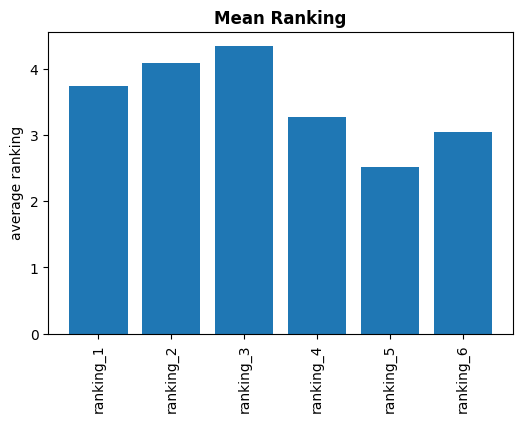

In [95]:
rankings = ('ranking_1', 'ranking_2', 'ranking_3', 'ranking_4','ranking_5', 'ranking_6')
plt.bar(rankings, means)
plt.xticks(np.arange(6), rankings, rotation=90, fontsize='10')
plt.title("Mean Ranking", fontweight='bold')
plt.ylabel("average ranking")
plt.show()

### Ranking
So far, we have cleaned up the data, renamed several columns, and computed the average ranking of each movie. As we suspected, it looks like the "original" movies are rated much more highly than the newer ones. i.e. the newer movies seems to be more popular than old ones.

## 6. Finding the Most Viewed Movie

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. When we call methods like [pandas.DataFrame.sum()]() or <font color=red>mean()</font>, they treat Booleans like integers. They consider <font color=red>True</font> a <font color=red>1</font> and <font color=red>False</font> a <font color=red>0</font>. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

Below we will use the <font color=red>df.sum()</font>
method to compute the sum of each<font color=red> seen</font> columns and make a bar chart of each ranking.

In [96]:
views = star_wars[star_wars.columns[3:9]].sum()
views

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

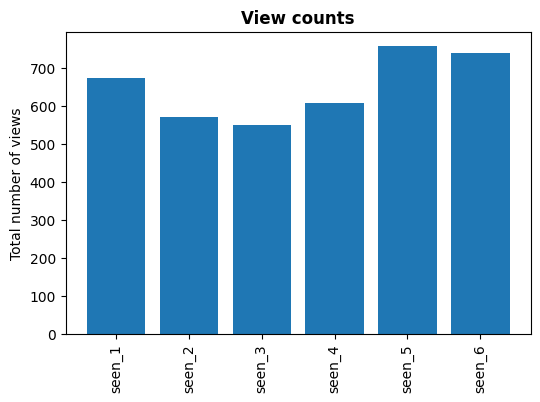

In [97]:
seens =  ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6']
plt.bar(seens, views)
plt.xticks(np.arange(6), seens, rotation=90, fontsize='10')
plt.title("View counts", fontweight='bold')
plt.ylabel("Total number of views")
plt.show()

### View counts

It appears that the original movies were viewed by more respondents than the newer movies. This correlate what we saw in the rankings, where the earlier movies seem to be more popular.

## 7. Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- <font color=red>Do you consider yourself to be a fan of the Star Wars film franchise?</font> — True or False
- <font color=red>Do you consider yourself to be a fan of the Star Trek franchise?</font> — <font color=red>Yes</font> or <font color=red>No</font>
- <font color=red>Gender</font> — <font color=red>Male</font> or <font color=red>Female</font>

We will split a DataFrame into two groups based on a binary column by creating two subsets of that column. For example, we can split on the Gender column like this:


In [98]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

### Males

#### a) Highest Ranked Movie 

In [99]:
mean_males_ranking = males[males.columns[9:15]].mean()
mean_males_ranking

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

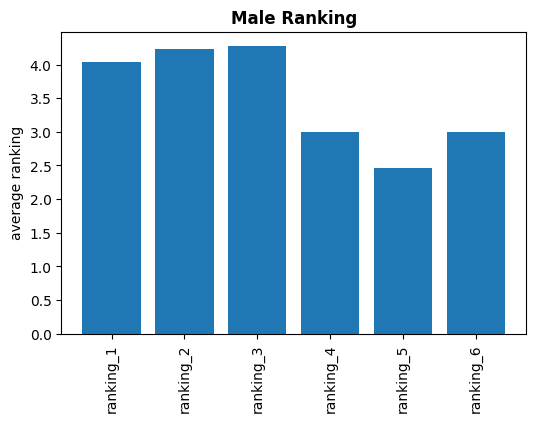

In [100]:
plt.bar(rankings, mean_males_ranking)
plt.xticks(np.arange(6), rankings, rotation=90, fontsize='10')
plt.title("Male Ranking", fontweight='bold')
plt.ylabel("average ranking")
plt.show()

#### b) Most Male Viewed Movies

In [103]:
male_views = males[males.columns[3:9]].sum()
male_views

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: int64

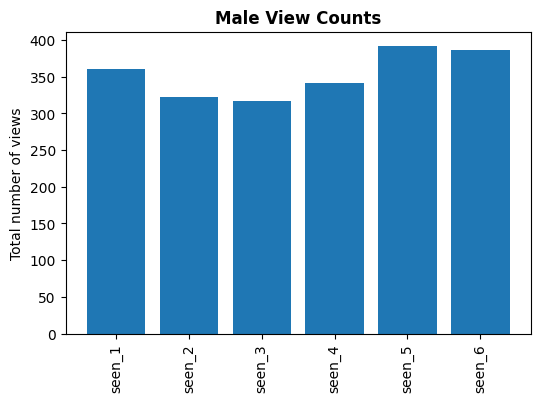

In [104]:
plt.bar(seens, male_views)
plt.xticks(np.arange(6), seens, rotation=90, fontsize='10')
plt.title("Male View Counts", fontweight='bold')
plt.ylabel("Total number of views")
plt.show()

### Females

#### a) Highest Ranked Movie 


In [105]:
mean_females_ranking = females[females.columns[9:15]].mean()
mean_females_ranking

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

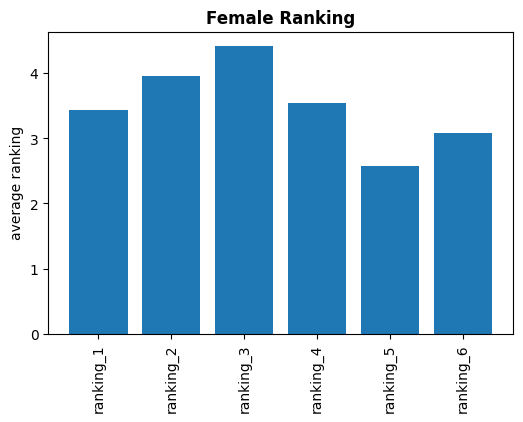

In [106]:
plt.bar(rankings, mean_females_ranking)
plt.xticks(np.arange(6), rankings, rotation=90, fontsize='10')
plt.title("Female Ranking", fontweight='bold')
plt.ylabel("average ranking")
plt.show()

#### b) Most Female Viewed Movies

In [108]:
female_views = females[females.columns[3:9]].sum()
female_views

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: int64

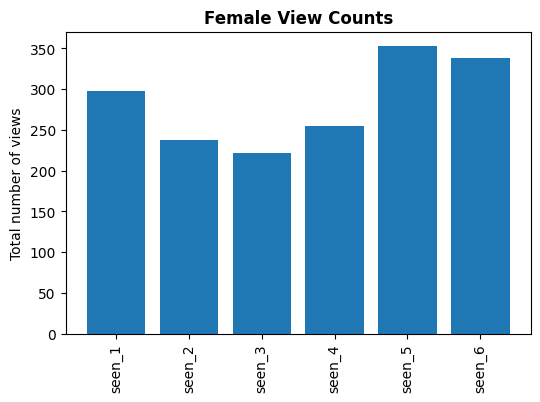

In [109]:
plt.bar(seens, female_views)
plt.xticks(np.arange(6), seens, rotation=90, fontsize='10')
plt.title("Female View Counts", fontweight='bold')
plt.ylabel("Total number of views")
plt.show()

### Comment: Male/Female differences in favorite Star Wars movie and most seen movie

Interestingly, more males watches episodes 1, 2 and 3, but males ranked them high than females. This means males liked episodes 1, 2 to 3 them far less than females did.